# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Latitude": city_lat,
                          "Longitude": city_lng,
                          "Max Temp (°C)": city_max_temp - 273.15, #Converts kelvin to celsius
                          "Humidity %": city_humidity,
                          "Cloudiness %": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | malango
Processing Record 6 of Set 1 | verkhnyaya sinyachikha
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | edd
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | yangor
City not found. Skipping...
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | nehe
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | in

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                585
Latitude            585
Longitude           585
Max Temp (°C)       585
Humidity %          585
Cloudiness %        585
Wind Speed (m/s)    585
Country             585
Date                585
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
0,ushuaia,-54.8000,-68.3000,5.06,100,100,1.40,AR,1731183096
1,utrik,11.2278,169.8474,28.48,80,76,9.82,MH,1731183330
2,vadso,70.0744,29.7487,2.09,87,75,4.12,NO,1731183332
3,bethel,41.3712,-73.4140,12.05,29,0,5.14,US,1731183333
4,malango,-2.9627,119.9001,18.26,96,80,1.32,ID,1731183334


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,5.06,100,100,1.40,AR,1731183096
1,utrik,11.2278,169.8474,28.48,80,76,9.82,MH,1731183330
2,vadso,70.0744,29.7487,2.09,87,75,4.12,NO,1731183332
3,bethel,41.3712,-73.4140,12.05,29,0,5.14,US,1731183333
4,malango,-2.9627,119.9001,18.26,96,80,1.32,ID,1731183334


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

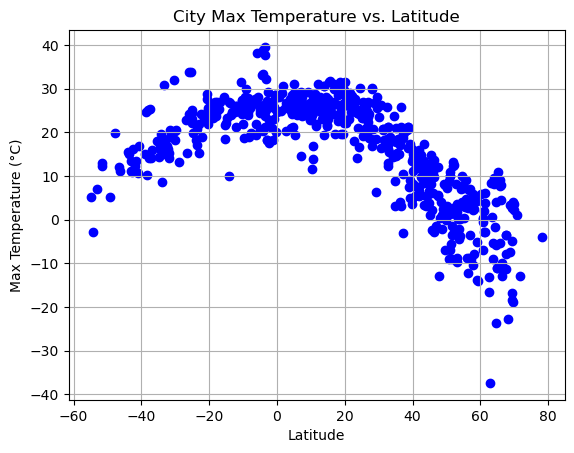

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp (°C)'], marker='o', color='blue')

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

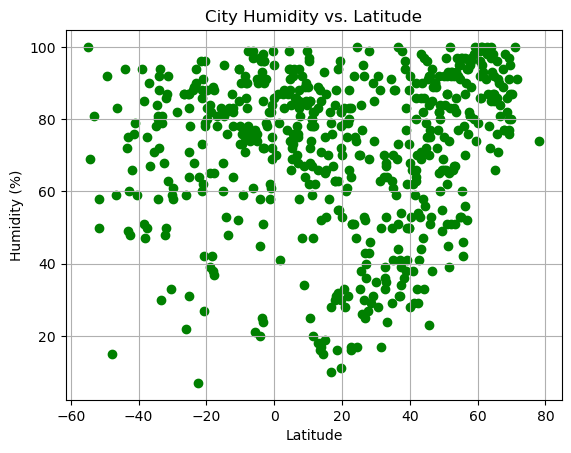

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity %'], marker='o', color='green')

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

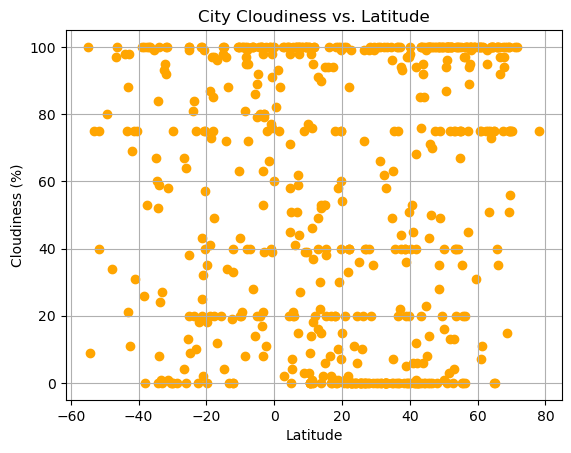

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness %'], marker='o', color='orange')

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

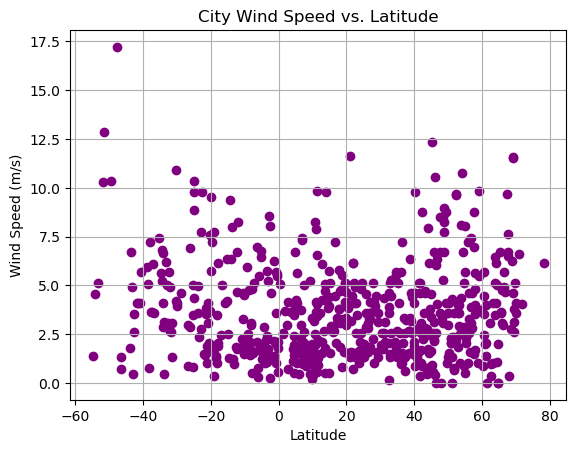

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed (m/s)'], marker='o', color='purple')

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, line, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Linear Regression: {y_label} vs {x_label}\nR² = {r_value**2:.2f}')
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,28.48,80,76,9.82,MH,1731183330
2,vadso,70.0744,29.7487,2.09,87,75,4.12,NO,1731183332
3,bethel,41.3712,-73.4140,12.05,29,0,5.14,US,1731183333
5,verkhnyaya sinyachikha,57.9760,61.6673,2.14,96,100,5.62,RU,1731183335
7,edd,13.9297,41.6925,30.69,52,0,9.78,ER,1731183337


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,5.06,100,100,1.40,AR,1731183096
4,malango,-2.9627,119.9001,18.26,96,80,1.32,ID,1731183334
6,adamstown,-25.0660,-130.1015,22.94,87,99,8.88,PN,1731183336
9,avarua,-21.2078,-159.7750,23.03,60,100,3.60,CK,1731183340
10,alofi,-19.0595,-169.9187,25.94,65,20,7.72,NU,1731183341


###  Temperature vs. Latitude Linear Regression Plot

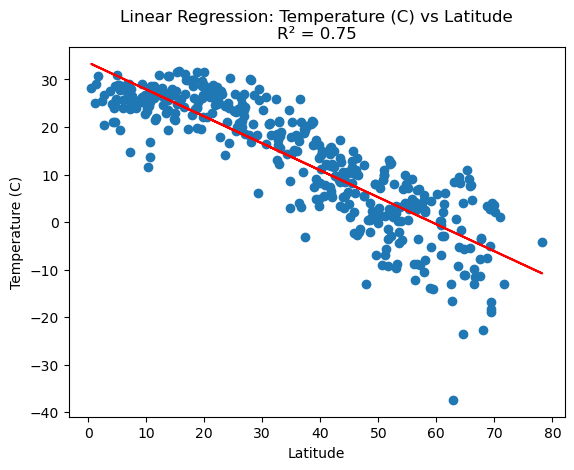

In [28]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Max Temp (°C)'], 'Latitude', 'Temperature (C)')

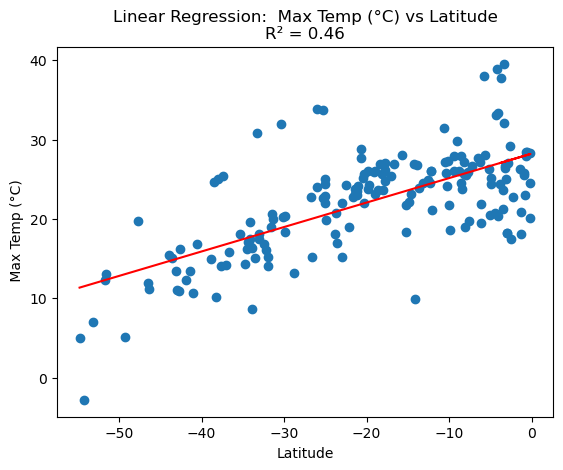

In [30]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Max Temp (°C)'], 'Latitude', ' Max Temp (°C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

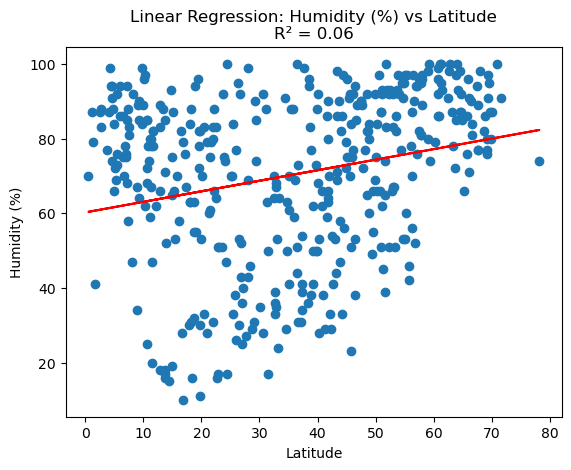

In [34]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Humidity %'], 'Latitude', 'Humidity (%)')

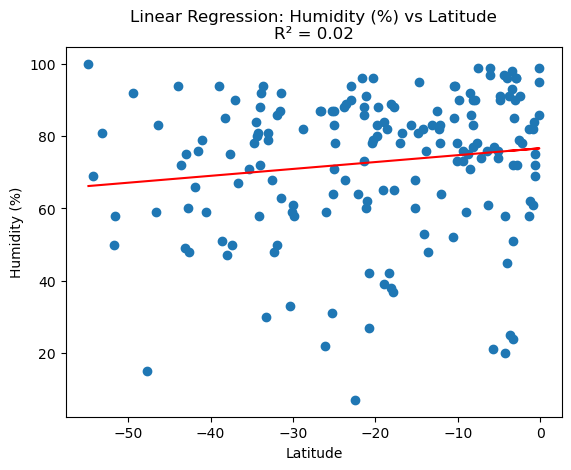

In [38]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Humidity %'], 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

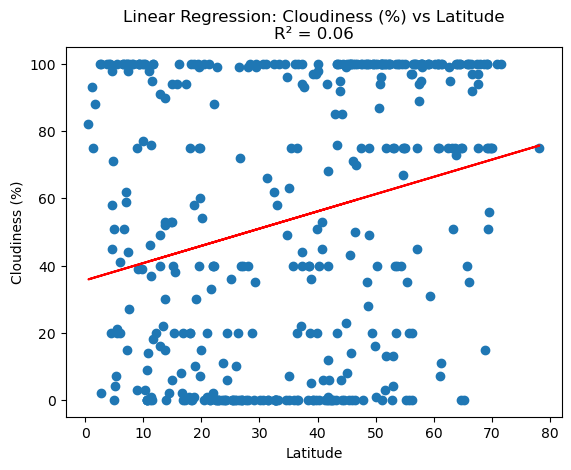

In [40]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness %'], 'Latitude', 'Cloudiness (%)')

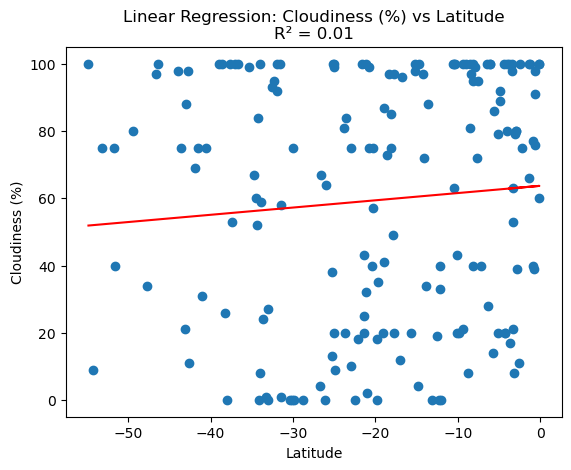

In [42]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness %'], 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

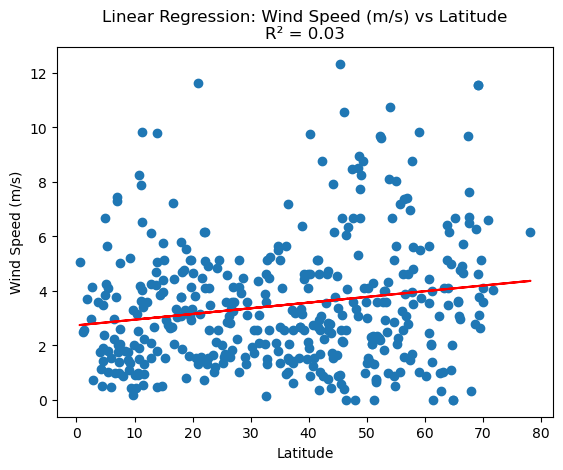

In [44]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed (m/s)'], 'Latitude', 'Wind Speed (m/s)')

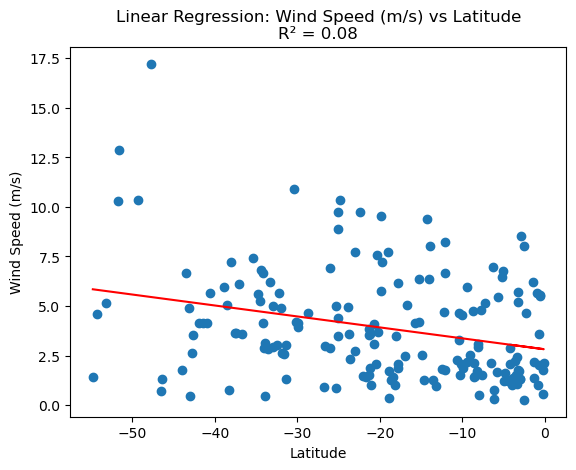

In [46]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed (m/s)'], 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE